In [26]:
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation or proccesing
import matplotlib.pyplot as plt # data vizualization
import seaborn as sns # data vizualization
plt.style.use('fivethirtyeight') # style of the plots

In [27]:
df = pd.read_csv('Social_Network_Ads.csv')

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
df = df.iloc[:,2:]

In [30]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train test split (this step Must have in all feature scaling)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1), df['Purchased'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [34]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [36]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [37]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

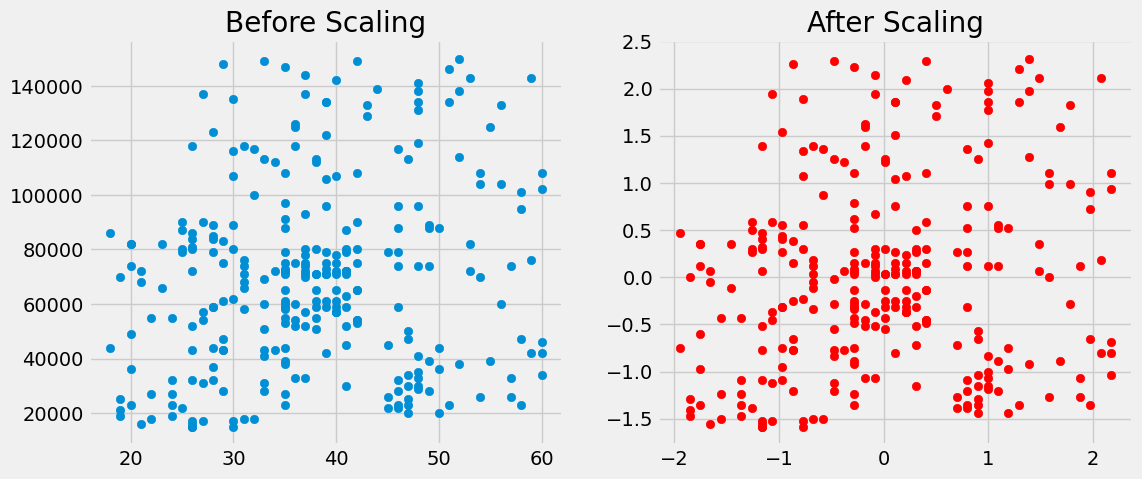

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After Scaling')
plt.show()

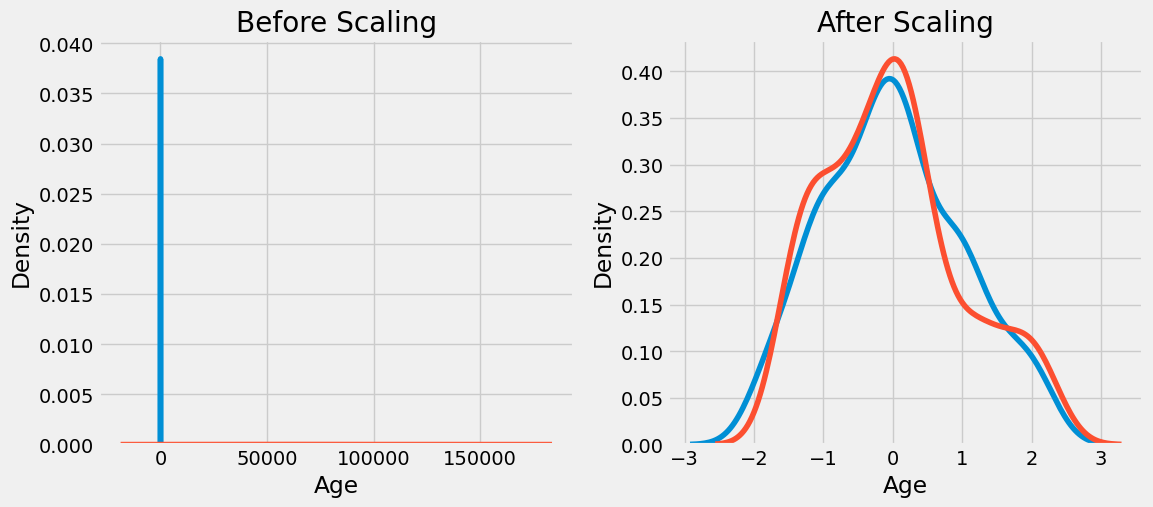

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#Before scaling
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title("Before Scaling")

#After scaling
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title("After Scaling")
plt.show()

# Comparison od Distribution

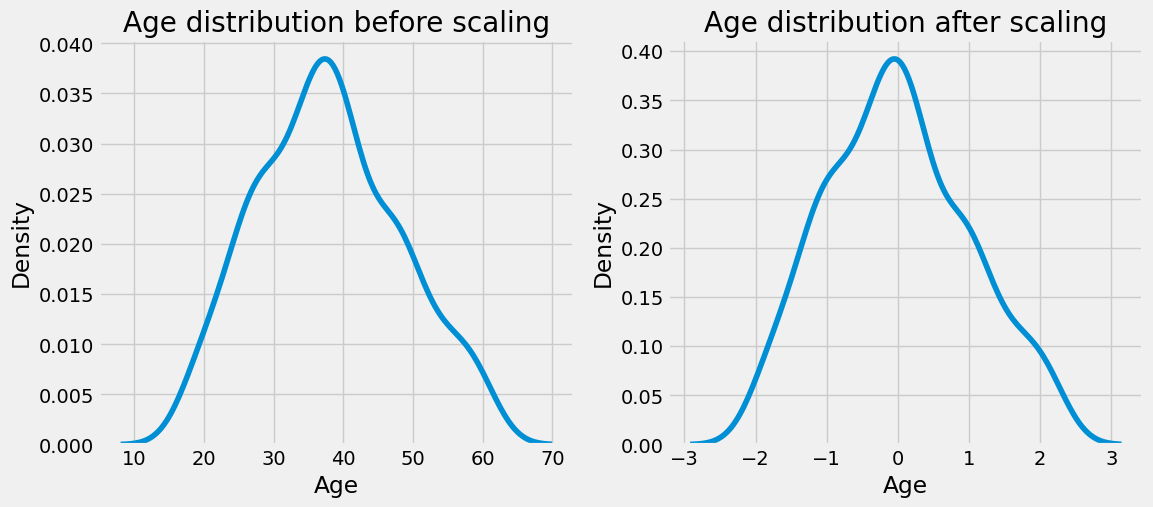

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#Before scaling
ax1.set_title('Age distribution before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
#After scaling
ax2.set_title('Age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [43]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
